# Principal Component Analysis

## import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [3]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

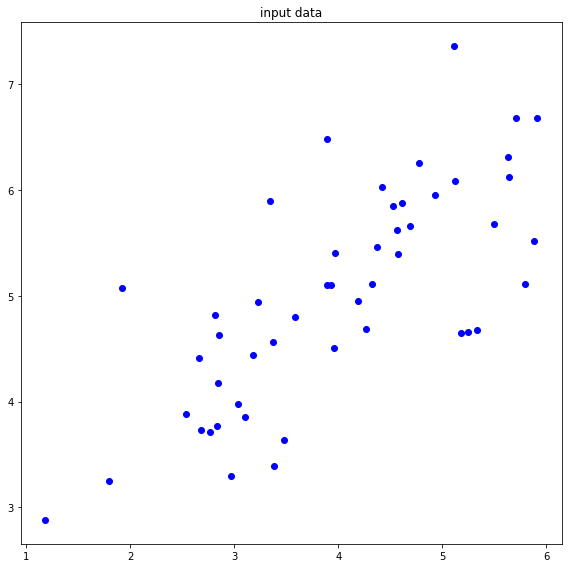

In [4]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [5]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x = feature[:,0]
    y = feature[:,1]
    x = (x - np.mean(x)) / np.std(x)
    y = (y - np.mean(y)) / np.std(y)
    feature_normalize = np.c_[x,y]
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [6]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [7]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Sigma = 1 / len(feature) * np.dot(feature.T, feature)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [9]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cov = compute_covariance(feature)
    F,S = np.linalg.eig(cov)
    sorted_index = np.argsort(F)[::-1]
    sorted_eigenvalue = F[sorted_index]
    sorted_eigenvectors  = S[:,sorted_index]
    principal_component_1 =  sorted_eigenvalue[0]* sorted_eigenvectors[:,0]
    principal_component_2 =  sorted_eigenvalue[1]* sorted_eigenvectors[:,1]
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [11]:
def compute_projection_onto_line(feature, vector):
 
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    vector_norm = np.sqrt(sum(vector**2))
    projection = np.zeros(shape=(50,2))
    for i in range(len(feature)):
        proj = (np.dot(feature[i], vector)/vector_norm**2) * vector
        projection[i] = proj
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

## compute the principal components and the projection of feature

In [12]:
 
(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

---

---

## functions for presenting the results

---

---

In [13]:
def function_result_01(): 
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [14]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(feature[:,0], feature[:,1], color = 'blue')
    plt.arrow(0, 0, principal_component_1[0],principal_component_1[1], color='r', width = 0.03)
    plt.arrow(0, 0, principal_component_2[0], principal_component_2[1], color='g', width = 0.03)
    #plt.annotate("", xy=principal_component_1[0]*(principal_component_2[0]), xytext=(0, 0),arrowprops=dict(arrowstyle="->",color='red'))
    #plt.annotate("", xy=principal_component_1[1]*(principal_component_2[1]), xytext=(0, 0),arrowprops=dict(arrowstyle="->", color ='green'))


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [20]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(feature[:,0], feature[:,1], color = 'blue')
    plt.axline((0,0), principal_component_1, color='r')

    plt.plot()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [21]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(feature[:,0], feature[:,1], color = 'blue')
    plt.axline((0,0), principal_component_2, color='r')

    plt.plot()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [34]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(feature[:,0], feature[:,1], color = 'blue')
    plt.scatter(projection1[:,0], projection1[:,1], color = 'g', zorder=2)
    plt.axline((0,0), principal_component_1, color='r', zorder=1)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [35]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(feature[:,0], feature[:,1], color = 'blue')
    plt.scatter(projection2[:,0], projection2[:,1], color = 'g', zorder=2)
    plt.axline((0,0), principal_component_2, color='r', zorder=1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [36]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(feature[:,0], feature[:,1], color = 'blue')
    plt.scatter(projection1[:,0], projection1[:,1], color = 'g', zorder=2)
    plt.axline((0,0), principal_component_1, color='r', zorder=1)
    
    for i, j in zip(feature, projection1):
        plt.plot([i[0], j[0]], [i[1], j[1]], c='gray')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [39]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(feature[:,0], feature[:,1], color = 'blue')
    plt.scatter(projection2[:,0], projection2[:,1], color = 'g', zorder=2)
    plt.axline((0,0), principal_component_2, color='r', zorder=1)
    
    for i, j in zip(feature, projection2):
        plt.plot([i[0], j[0]], [i[1], j[1]], c='gray')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


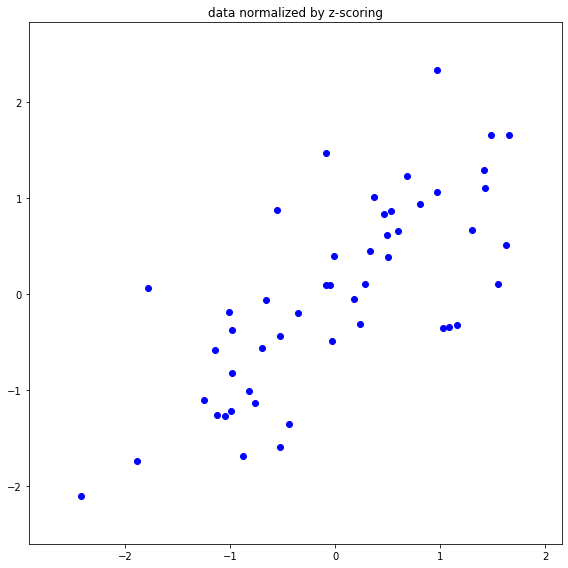

**************************************************
## [RESULT 02]
**************************************************


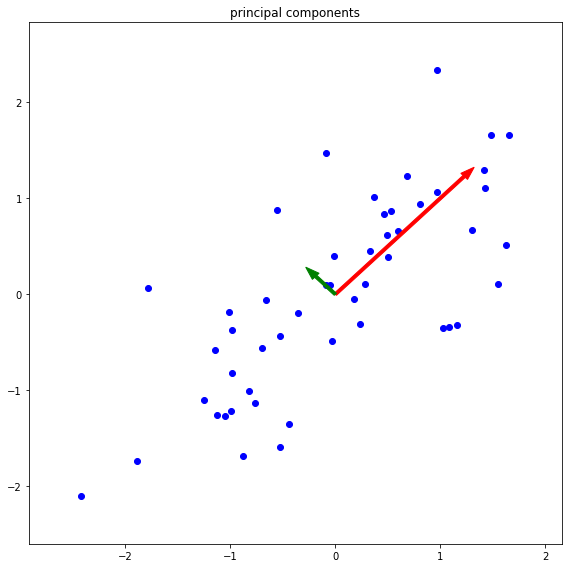

**************************************************
## [RESULT 03]
**************************************************


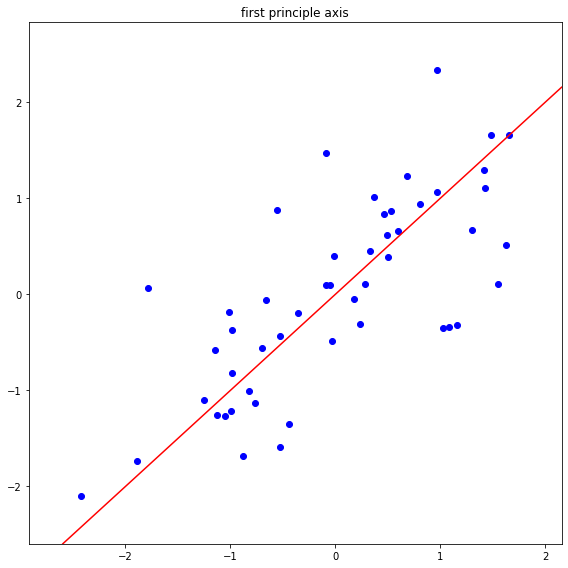

**************************************************
## [RESULT 04]
**************************************************


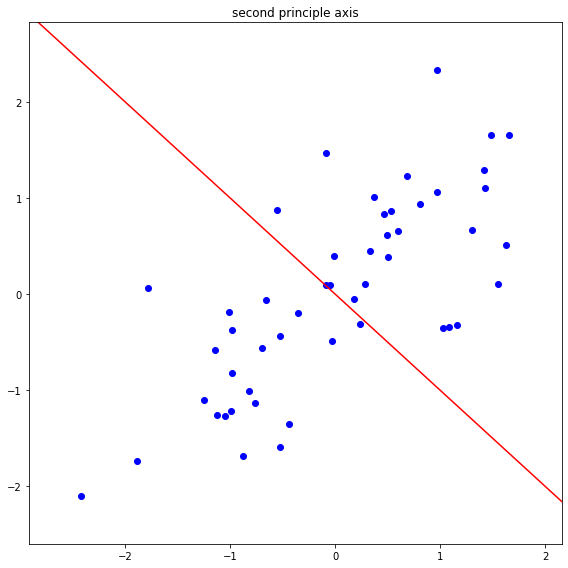

**************************************************
## [RESULT 05]
**************************************************


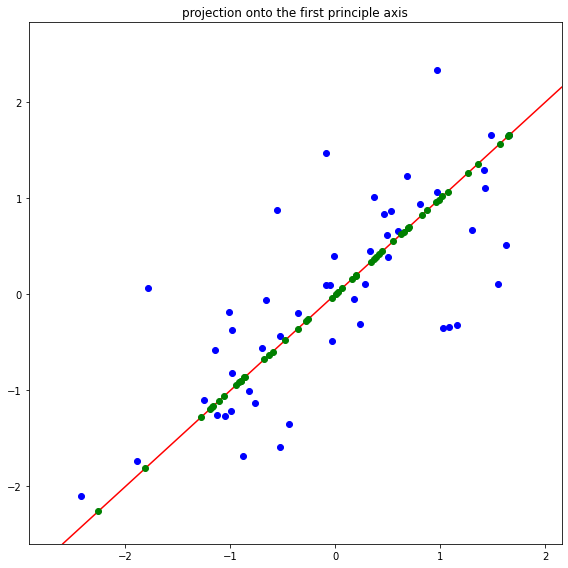

**************************************************
## [RESULT 06]
**************************************************


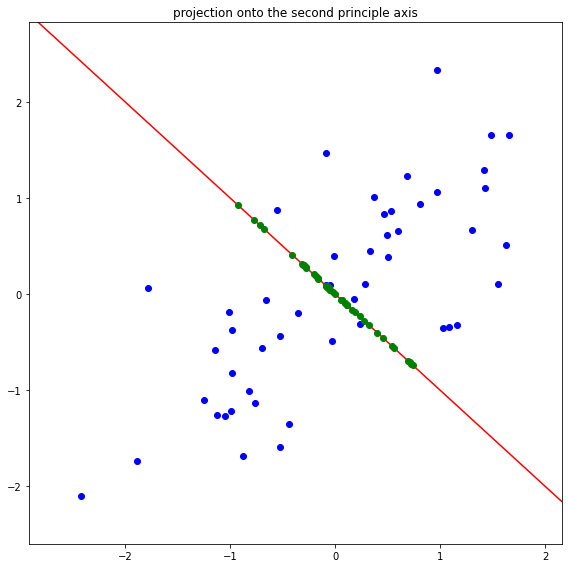

**************************************************
## [RESULT 07]
**************************************************


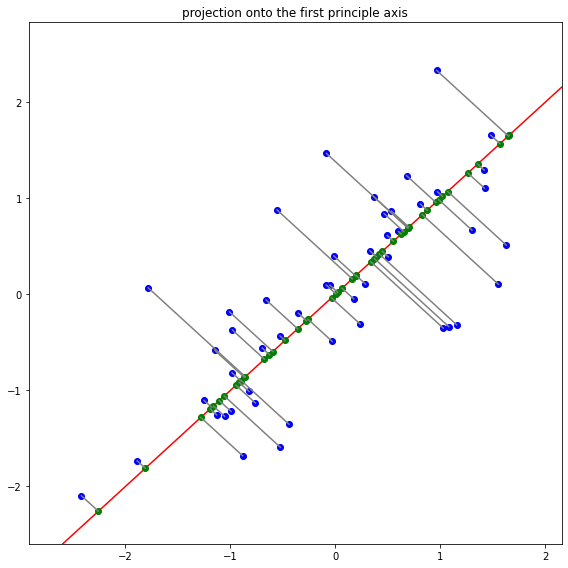

**************************************************
## [RESULT 08]
**************************************************


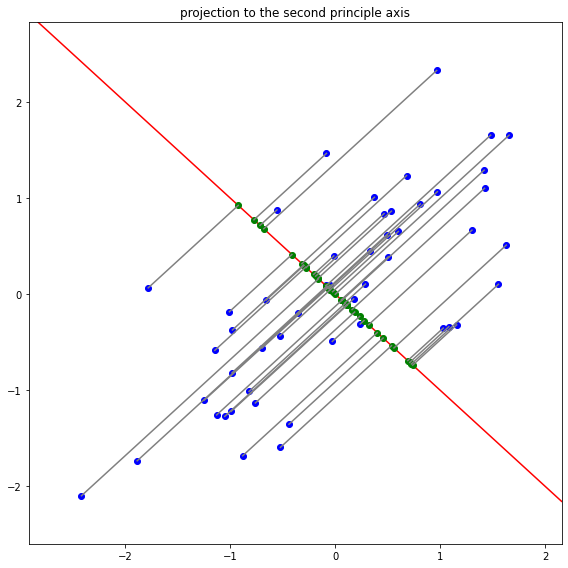

In [40]:
number_result =8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)